# General data reader for AQUA 
## Additional data sources

We added a few new observational data sources to the intake catalogue, synchronized between lumi and levante.

### Inspecting available datasets

Multiple datasets area available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalog` function

In [1]:
from aqua import catalog, inspect_catalog
cat = catalog()

Catalog: nextgems4
ICON	ngc4008	nextGEMS4 ICON scenario run ssp370. 10km atm/5km oce 30 years saved on HeaPix grid
	- P1D	
	- PT3H	
	- PT15M	
	- lra-r100-monthly	LRA data monthly at r100
	- lra-r100-monthly-zarr	LRA data monthly at r100 reference on zarr

IFS-FESOM	historical-1990	FDB IFS-FESOM tco1279-ng5 nextGEMS cycle4 historical 1990
	- 2D_hourly_healpix512	
	- 3D_hourly_healpix512	
	- 2D_hourly_healpix128	
	- 3D_hourly_healpix128	
	- 2D_monthly_0.25deg	
	- 3D_monthly_0.25deg	
	- 2D_daily_healpix512_ocean	
	- 3D_daily_healpix512_ocean	
	- 2D_daily_healpix128_ocean	
	- 3D_daily_healpix128_ocean	
	- hourly-hpz7-atm2d-fdb1	hourly 2D atmospheric data on healpix grid (zoom=7, h128).
	- hourly-hpz7-atm3d-fdb1	hourly 3D atmospheric data on healpix grid (zoom=7, h128).
	- daily-hpz7-oce2d-fdb1	daily 2D oceanic data on healpix grid (zoom=7, h128).
	- hourly-hpz9-atm2d-fdb1	hourly 2D atmospheric data on healpix grid (zoom=9, 512h).
	- hourly-hpz9-atm3d-fdb1	hourly 3D atmospheric data on heal

Here below a short exploration at catalog, model and experiment level.
Without specifying any argument, the function will explore the first catalog listed in the `config-aqua.yaml` file.

In [2]:
inspect_catalog()

Models available in catalog nextgems4:


['ICON', 'IFS-FESOM']

The inspection of a specific catalog can be done by specifying the catalog name as argument `catalog_name='catalog_name'`.

In [3]:
inspect_catalog(catalog_name='obs')

Models available in catalog obs:


['AVISO',
 'CERES',
 'EN4',
 'ESA-CCI',
 'ERA5',
 'GPM',
 'MSWEP',
 'OSI-SAF',
 'PHC3',
 'PSC',
 'WOA18']

In [5]:
inspect_catalog(catalog_name='obs', model='CERES', exp='ebaf-toa41')

Sources available in catalog obs for model CERES and exp ebaf-toa41:


['monthly']

### MSWEP precipitation data

MSWEP is a high-quality and very high resolution (5km) dataset available [here](http://www.gloh2o.org/mswep/). We download the MSWEP data archive to be used to provide an observational reference dataset for precipitation. Data are available at 3hourly, daily and monthly time resolutions.

In [6]:
from aqua import Reader
reader = Reader(model="MSWEP", exp="past", source="monthly")

(there is also a "monthlyz" source, which is an experimental zarr version mapped with kerchunk)

In [7]:
data = reader.retrieve()

The fixer (on by default) has renamed the MSWEP `precipitation` variable to `mtpr` and converted its units (it was monthly cumulated precipitation).

In [8]:
data.mtpr

<xarray.DataArray 'mtpr' (time: 502, lat: 1800, lon: 3600)> Size: 13GB
dask.array<getitem, shape=(502, 1800, 3600), dtype=float32, chunksize=(32, 113, 450), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-02-01 1979-03-01 ... 2020-11-01
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
Attributes:
    units:        kg m**-2 s**-1
    history:      \n2024-10-11 16:02:39 AQUA💧: Variable renamed mtpr by fixer...
    paramId:      235055
    long_name:    Mean total precipitation rate
    shortName:    mtpr
    factor:       3.802570537683474e-07
    src_units:    mm month-1
    units_fixed:  1

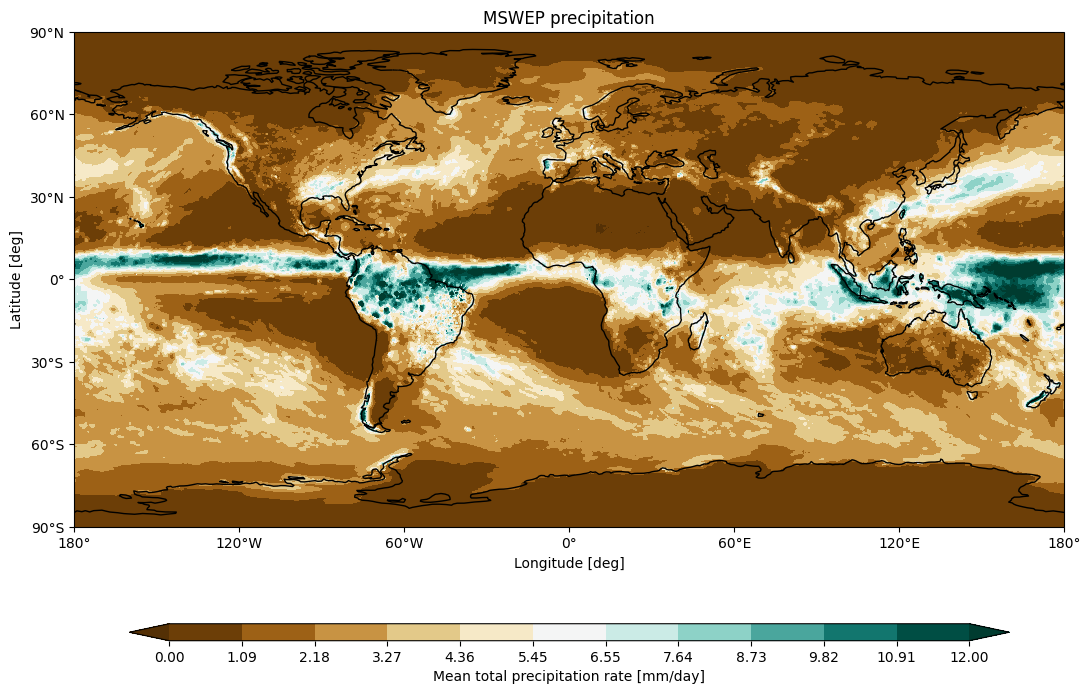

In [9]:
from aqua import plot_single_map
data_pr = data.mtpr.isel(time=[0,1,2,3]).mean("time") * 86400 # convert to mm/day
plot_single_map(data_pr, cyclic_lon=False, vmin=0, vmax=12, cmap='BrBG', title="MSWEP precipitation", cbar_label="Mean total precipitation rate [mm/day]")

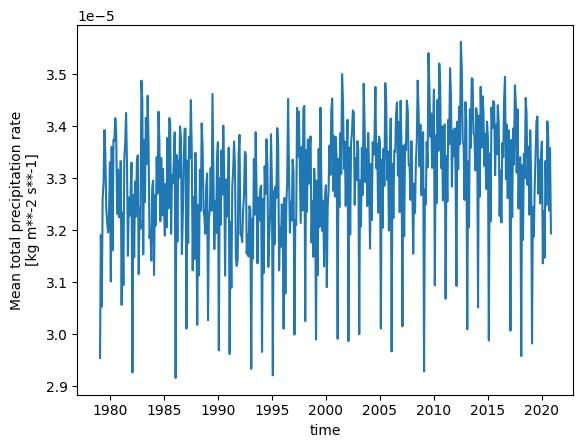

In [26]:
reader.fldmean(data.mtpr).plot()

### ERA5 data

An ERA5 catalog is available. Introduced by AQUA team, includes monthly data from a few selected variables, which can be accessed via the `exp=era5` exp key and few variables at hourly frequency, accessible with `source=daily`.

In [28]:
from aqua import Reader
reader = Reader(model="ERA5", exp="era5", source="monthly")
data = reader.retrieve()
data

2024-02-22 18:32:38 :: eccodes :: WARNING  -> ShortName tcc has multiple grib codes associated: ['228164', '164']
2024-02-22 18:32:38 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right
2024-02-22 18:32:38 :: eccodes :: WARNING  -> ShortName lcc has multiple grib codes associated: ['3073', '186']
2024-02-22 18:32:38 :: eccodes :: WARNING  -> AQUA will take the first so that lcc -> 3073, please set up a correct fix if this does not look right
2024-02-22 18:32:38 :: eccodes :: WARNING  -> ShortName mcc has multiple grib codes associated: ['3074', '187']
2024-02-22 18:32:38 :: eccodes :: WARNING  -> AQUA will take the first so that mcc -> 3074, please set up a correct fix if this does not look right
2024-02-22 18:32:38 :: eccodes :: WARNING  -> ShortName hcc has multiple grib codes associated: ['3075', '188']
2024-02-22 18:32:38 :: eccodes :: WARNING  -> AQUA will take the first so that hcc -> 3075, please set u

<xarray.Dataset> Size: 199GB
Dimensions:     (time: 996, lat: 721, lon: 1440, plev: 8)
Coordinates:
  * time        (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2022-12-01
  * lat         (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon         (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * plev        (plev) float64 64B 1e+05 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
Data variables: (12/20)
    avg_siconc  (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mer         (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    hcc         (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    lcc         (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mcc         (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    msl         (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...          ...
    tcc         (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtpr        (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtnswrf     (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtnlwrf     (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    u           (time, plev, lat, lon) float32 33GB dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    v           (time, plev, lat, lon) float32 33GB dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Dec 06 11:40:11 2023: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We can then plot easily the global averaged temperature evolition of ERA5 using the`fldmean()` method

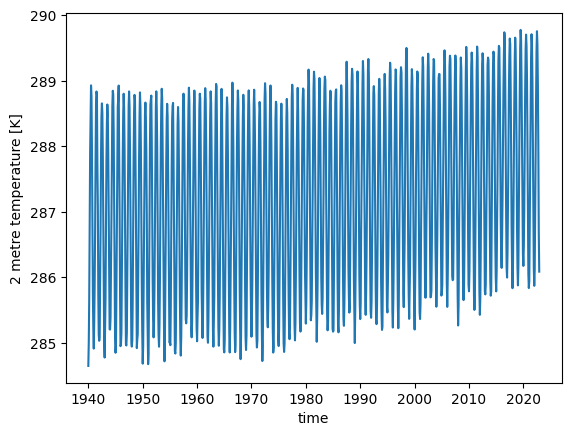

In [29]:
reader.fldmean(data['2t']).plot()

### AVISO SSH data

In [10]:
from aqua import Reader
reader = Reader(model="AVISO", exp="ssh-L4", source="daily")
data = reader.retrieve()
data

2024-10-11 16:03:47 :: Reader :: WARNING  -> The requested default fixer name AVISO-default does not exist in fixes files
2024-10-11 16:03:47 :: Reader :: WARNING  -> No fixes available for model AVISO, experiment ssh-L4, source daily
2024-10-11 16:03:48 :: Reader :: WARNING  -> Variable crs has no units!
2024-10-11 16:03:48 :: Reader :: WARNING  -> Variable flag_ice has no units!


<xarray.Dataset> Size: 893GB
Dimensions:         (time: 10766, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
  * latitude        (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 8B 0 1
  * time            (time) datetime64[ns] 86kB 1993-01-01 ... 2022-06-23
Data variables: (12/14)
    adt             (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    crs             (time) float64 86kB dask.array<chunksize=(1,), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_ugosa       (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_vgosa       (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    sla             (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 86kB dask.array<chunksize=(1,), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa           (time, latitude, longitude) float64 89GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

We can then plot some of the dataset variables as

2024-10-11 16:03:55 :: plot_single_map :: WARNING  -> Cyclic longitude can be set to False with the cyclic_lon kwarg


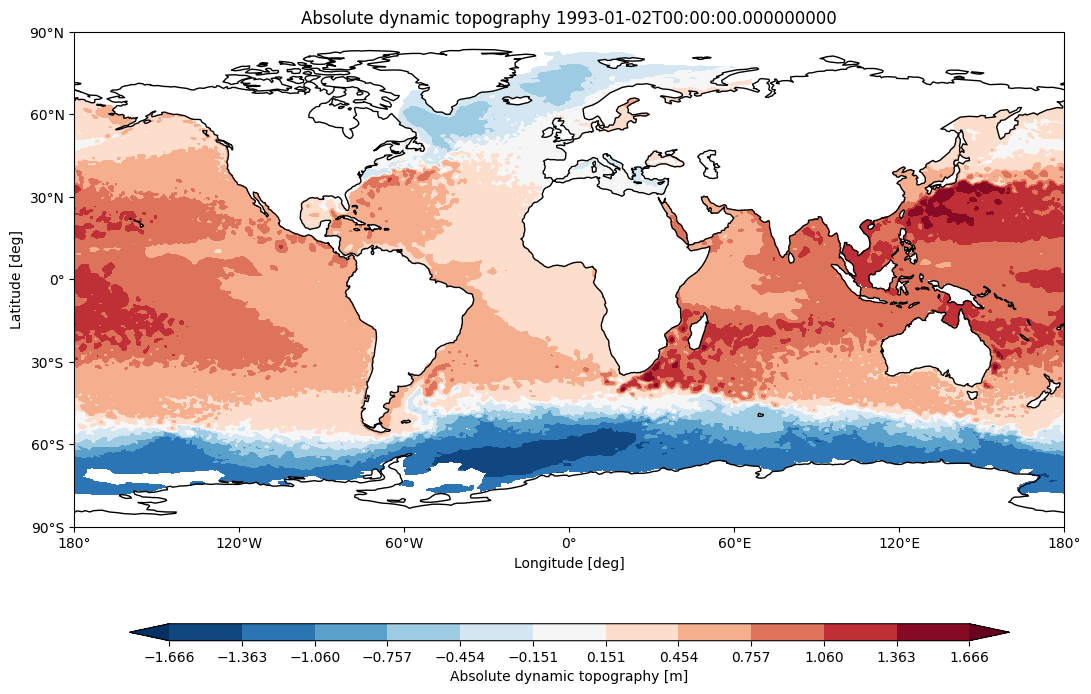

In [11]:
plot_single_map(data['adt'][1,:,:], sym=True)

### CERES radiation data

Similarly, radiation data is available accessing CERES data, both energy balanced ("EBAF") and not ("SYN"). However, correction has been applied to SYN so that they can be considerebe reliable for model evaluation

In [34]:
from aqua import Reader
reader = Reader(model="CERES", exp="ebaf-toa42", source="monthly")
data = reader.retrieve()
data

<xarray.Dataset> Size: 927MB
Dimensions:                      (time: 275, lon: 360, lat: 180)
Coordinates:
  * time                         (time) datetime64[ns] 2kB 2000-03-15 ... 202...
  * lon                          (lon) float32 1kB 0.5 1.5 2.5 ... 358.5 359.5
  * lat                          (lat) float32 720B -89.5 -88.5 ... 88.5 89.5
Data variables: (12/13)
    toa_sw_all_mon               (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_all_mon               (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_all_mon              (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon             (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon             (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon            (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    ...                           ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldpress_total_daynight_mon  (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtemp_total_daynight_mon   (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtau_total_day_mon         (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    mtnlwrf                      (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    mtnswrf                      (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.2; Release Date December 9, 2022
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2
    Fill_Value:   Fill Value is -999.0
    history:      Tue May 02 12:30:56 2023: cdo -selname,cldarea_total_daynig...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

The 2d plot of the June TOA net radiation can be easily produced like this

2024-02-22 18:36:37 :: Check coordinates :: WARNING  -> lon_min and lon_max are the same, setting them to default values


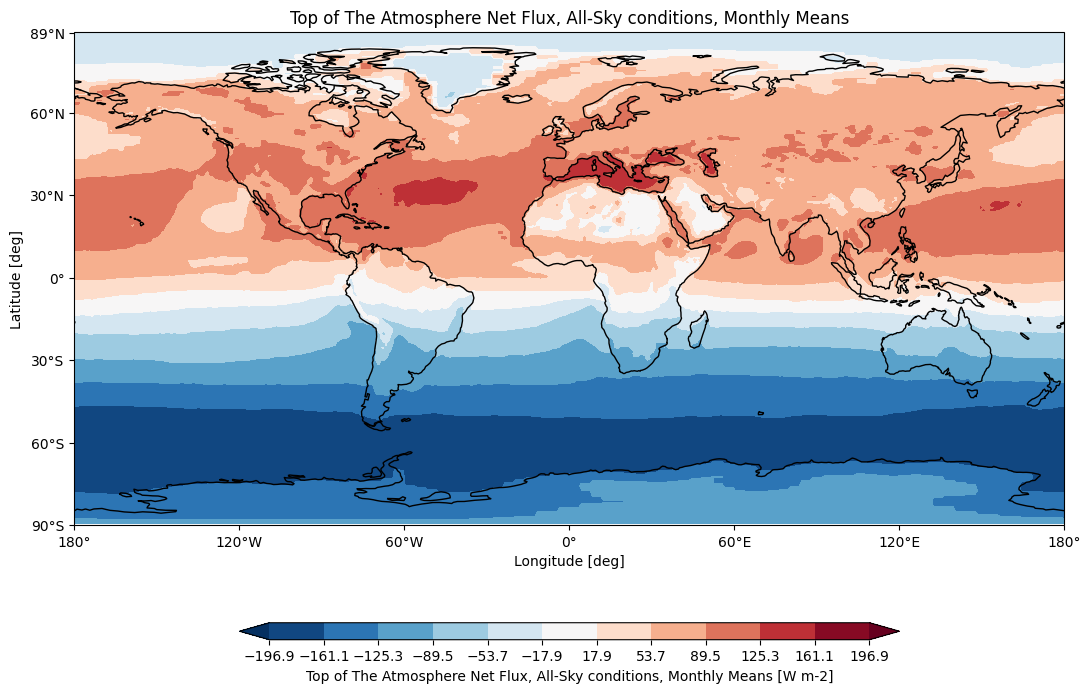

In [35]:
plot_single_map(data['toa_net_all_mon'].sel(time=data.time.dt.month==6).mean(dim='time'), sym=True)

Similarly, we can access to the SYN daily data

In [36]:
reader = Reader(model="CERES", exp="syn-toa41", source="daily")
data = reader.retrieve()
data

<xarray.Dataset> Size: 20GB
Dimensions:                 (time: 7670, lat: 180, lon: 360)
Coordinates:
  * time                    (time) datetime64[ns] 61kB 2001-01-01T12:00:00 .....
  * lat                     (lat) float32 720B -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                     (lon) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
Data variables:
    toa_sw_all_daily        (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_lw_all_daily        (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_net_all_daily       (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_lw_all_daily_eb     (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_sw_all_daily_eb     (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_solar_all_daily_eb  (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    mtntrf                  (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    mtnsrf                  (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    mtnlwrf                 (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    mtnswrf                 (time, lat, lon) float32 2GB dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
Attributes:
    title:        CERES SYN1deg Daily data
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:       
    Version:      Edition 4.1: Release Date August 22, 2019
    DOI:          10.5067/Terra+Aqua/CERES/SYN1degDay_L3.004A
    Fill_Value:   Fill Value is -999.0
    history:      \n2024-02-22 18:36:53 AQUA💧: Retrieved from CERES_syn-toa41...

We can easily plot a timeseries of daily data using the reader fldmean options

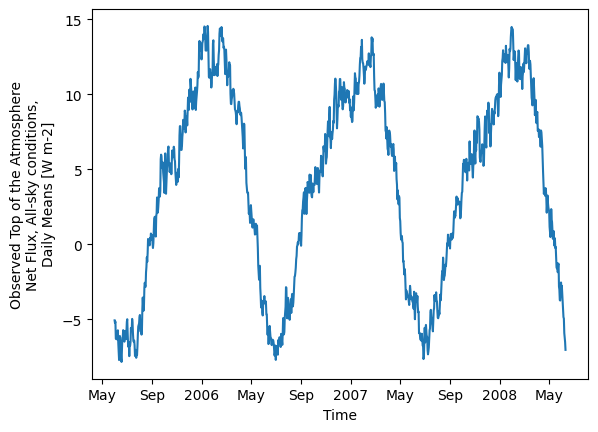

In [37]:
reader.fldmean(data['toa_net_all_daily'].sel(time=slice("2005-06-01", "2008-06-10"))).plot()

# WOA18

Also some oceanic dataset is now available, on multiple levels

In [37]:
from aqua import Reader
reader = Reader(model="WOA18", exp="woa18_2005_2017", source="annual", areas=False, loglevel='DEBUG')
woa = reader.retrieve()
woa

2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b382289/.aqua
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b382289/.aqua/config-aqua.yaml
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Catalog found in /home/b/b382289/.aqua/config-aqua.yaml file are ['nextgems4', 'nextgems3', 'levante', 'climatedt-phase1', 'ci', 'obs']
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Available catalogs are ['nextgems4', 'nextgems3', 'levante', 'climatedt-phase1', 'ci', 'obs']
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Default catalog will be nextgems4
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382289/.aqua/catalogs/nextgems4/catalog.yaml
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Machine file is /home/b/b382289/.aqua/catalogs/nextgems4/machine.yaml
2024-10-11 16:27:54 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to levante
2024-10-11 16:27:54 :: ConfigPath ::

<xarray.Dataset> Size: 8GB
Dimensions:             (lat: 720, nbounds: 2, lon: 1440, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                 (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * depth               (depth) float32 408B 0.0 5.0 10.0 ... 5.4e+03 5.5e+03
  * time                (time) float32 4B 726.0
Dimensions without coordinates: nbounds
Data variables: (12/18)
    lat_bnds            (lat, nbounds) float32 6kB dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    depth_bnds          (depth, nbounds) float32 816B dask.array<chunksize=(102, 2), meta=np.ndarray>
    climatology_bounds  (time, nbounds) float32 8B dask.array<chunksize=(1, 2), meta=np.ndarray>
    s_an                (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    s_mn                (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    ...                  ...
    t_mn                (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_dd                (time, depth, lat, lon) float64 846MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_sd                (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_se                (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_oa                (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_gp                (time, depth, lat, lon) float64 846MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    history:                         \n2024-10-11 16:27:54 AQUA💧: Retrieved f...

The interpolation on multiple levels is supported

In [18]:
from aqua import Reader
reader = Reader(model="WOA18", exp="woa18_2005_2017", source="annual", regrid='r100', areas=False)
woa = reader.retrieve(var='t_an')
woa

2024-10-11 16:11:10 :: Reader :: WARNING  -> The requested default fixer name WOA18-default does not exist in fixes files
2024-10-11 16:11:10 :: Reader :: WARNING  -> No fixes available for model WOA18, experiment woa18_2005_2017, source annual


<xarray.Dataset> Size: 423MB
Dimensions:    (time: 1, depth: 102, lat: 720, lon: 1440)
Coordinates:
  * lat        (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon        (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth      (depth) float32 408B 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time       (time) float32 4B 726.0
    idx_depth  (depth) int64 816B 0 1 2 3 4 5 6 7 ... 94 95 96 97 98 99 100 101
Data variables:
    t_an       (time, depth, lat, lon) float32 423MB dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    history:                         \n2024-10-11 16:11:11 AQUA💧: Retrieved f...

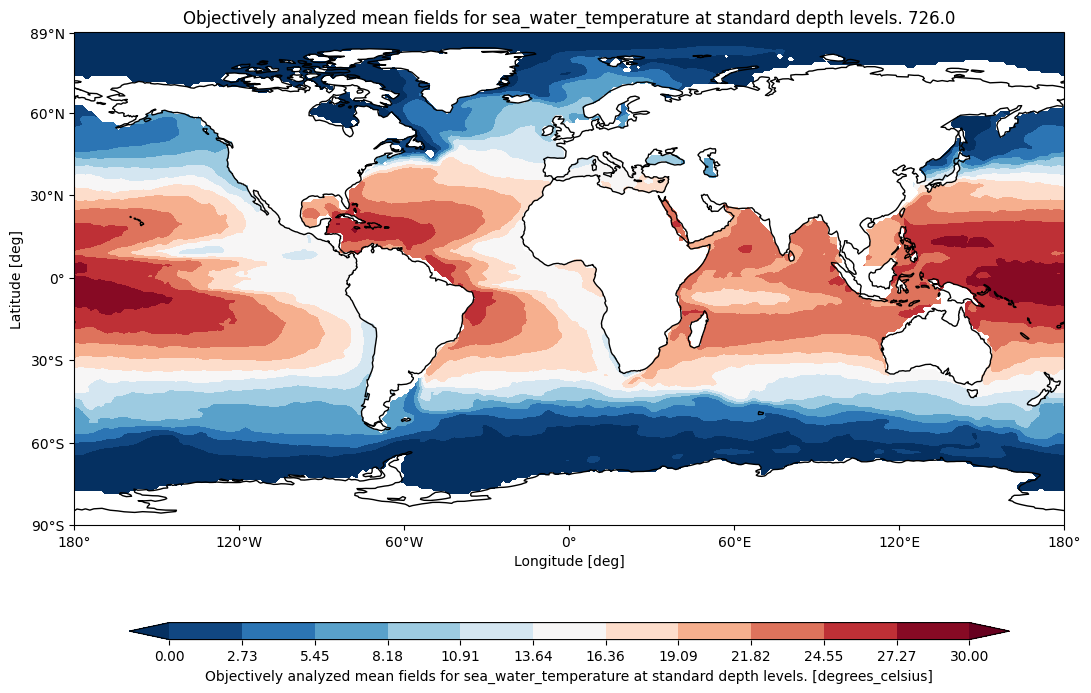

In [19]:
out = reader.regrid(woa.t_an).isel(depth=20)
out = out.squeeze()
plot_single_map(out, vmin=0, vmax=30)

### PSC - GIOMAS and PIOMAS datasets

A sea ice volume (`avg_sivol`) dataset is present for the Northern Hemisphere (PIOMAS) and the Southern Hemisphere (GIOMAS).

In [39]:
reader = Reader(model='PSC', exp='GIOMAS', source='monthly', regrid='r050')
data = reader.retrieve()
data = reader.regrid(data)

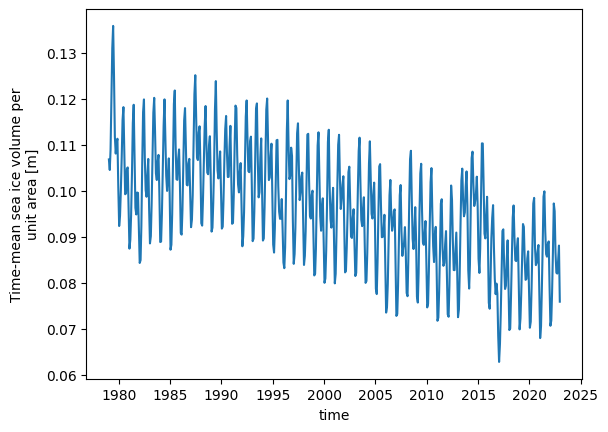

In [40]:
reader.fldmean(data.avg_sivol).plot()